# LinearRegression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight') 
plt.rc('font', size=8)

In [17]:
def mse(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

def r2_score(y_real, y_pred):
    SSres = np.sum((y_real - y_pred)**2)
    SStot = np.sum((y_real - np.mean(y_pred))**2)    
    return 1 - (SSres / SStot)

In [18]:
class LinearRegression:

    def __init__(self,
                 iterations=10000,
                 eta=1e-3,
                 early_stopping_diff=None,
                 fit_intercept=True,
                 weights=None,
                 verbose=False,
                 history_step=1000,
                 save_coef_history=False):

        self._iterations = iterations
        self._eta = eta
        self._stopping_diff = early_stopping_diff
        self._prev_error = float("inf")
        self._fit_intercept = fit_intercept

        self._w = weights

        self._verbose = verbose
        self._history_step = history_step
        self._save_coef = save_coef_history
        self.clear_history()

    @property
    def history(self):
        return pd.DataFrame(self._history)

    @property
    def coef_(self):
        return self._w.copy()
    
    @property
    def coef_history(self):
        return self._coef_history.copy()
        
    def fit(self, X, y):
        X, y = self._prepare_data(X, y)
        self._init_weights(X.shape[1])

        y_pred = self.predict(X)
        self._save_history(y, y_pred)

        n = len(y)
        for i in range(self._iterations):
            y_pred = self.predict(X)
            grad = 2/n * (X.T @ (y_pred - y))
            self._w -= self._eta * grad

            if self._early_stopping(y, y_pred):
                break

            if i % self._history_step == 0 and i > 0:
                self._save_history(y, y_pred)

        y_pred = self.predict(X)
        self._save_history(y, y_pred)
        return self.history

    def predict(self, X):
        return X @ self._w

    def _prepare_data(self, X, y):
        X = np.array(X)
        if len(X.shape) != 2:
            raise ValueError("Wrong X shape! (len(X.shape) != 2)")

        if self._fit_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))

        y = np.array(y)
        return X, y

    def _init_weights(self, size):
        if self._w is None:
            self._w = np.random.rand(size)
            self.clear_history()

    def _early_stopping(self, y_real, y_pred):
        if self._stopping_diff is not None:
            error = mse(y_real, y_pred)
            if abs(error - self._prev_error) < self._stopping_diff:
                return True

            self._prev_error = error

        return False    

    def clear_history(self):
        self._history = {"step": [], "loss": [], "r2_score": []}
        self._coef_history = None

    def _save_history(self, y_real, y_pred):
        if not self._history["step"]:
            step = 0
        else:
            step = self._history["step"][-1] + 1

        loss = mse(y_real, y_pred)
        r2 = r2_score(y_real, y_pred)

        self._history["step"].append(step)
        self._history["loss"].append(loss)
        self._history["r2_score"].append(r2)

        if self._save_coef:
            if self._coef_history is None:
                self._coef_history = self.coef_

            self._coef_history = np.vstack(
                (self._coef_history, self.coef_)
            )

        if self._verbose:
            message = f"Step: {step};"
            message += f" loss: {round(loss, 6)};"
            message += f" r2_score: {round(r2, 6)};"
            print(message)

Подготовим данные для обучения

In [19]:
X = np.array([[1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60] # Средний балл на экзамене

In [20]:
def plot_history(history):
    loss = history['loss'][len(history)-1]
    r2 = history['r2_score'][len(history)-1]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"Loss ({round(loss, 6)})")
    plt.xlabel("Step")
    plt.plot(history["step"], history["loss"], alpha=0.7)
    plt.scatter(history["step"], history["loss"], color="red")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.title(f"R2_score ({round(r2, 6)})")
    plt.xlabel("Step")
    plt.plot(history["step"], history["r2_score"], alpha=0.7)
    plt.scatter(history["step"], history["r2_score"], color="red")
    plt.grid(True)

    plt.show()

Step: 0; loss: 3173.15; r2_score: 0.008964;
Step: 1; loss: 415.355423; r2_score: -0.18145;
Step: 2; loss: 176.468066; r2_score: 0.2376;
Step: 3; loss: 92.059324; r2_score: 0.512985;
Step: 4; loss: 62.23424; r2_score: 0.6424;
Step: 5; loss: 51.695809; r2_score: 0.693627;
Step: 6; loss: 47.972148; r2_score: 0.712506;
Step: 7; loss: 46.656425; r2_score: 0.719278;
Step: 8; loss: 46.191526; r2_score: 0.721684;
Step: 9; loss: 46.027258; r2_score: 0.722535;
Step: 10; loss: 45.969215; r2_score: 0.722836;
Step: 11; loss: 45.948706; r2_score: 0.722943;
Step: 12; loss: 45.94146; r2_score: 0.722981;
Step: 13; loss: 45.938899; r2_score: 0.722994;
Step: 14; loss: 45.937994; r2_score: 0.722999;
Step: 0; loss: 3173.15; r2_score: 0.008964;
Step: 1; loss: 415.355423; r2_score: -0.18145;
Step: 2; loss: 176.468066; r2_score: 0.2376;
Step: 3; loss: 92.059324; r2_score: 0.512985;
Step: 4; loss: 62.23424; r2_score: 0.6424;
Step: 5; loss: 51.695809; r2_score: 0.693627;
Step: 6; loss: 47.972148; r2_score: 0.71

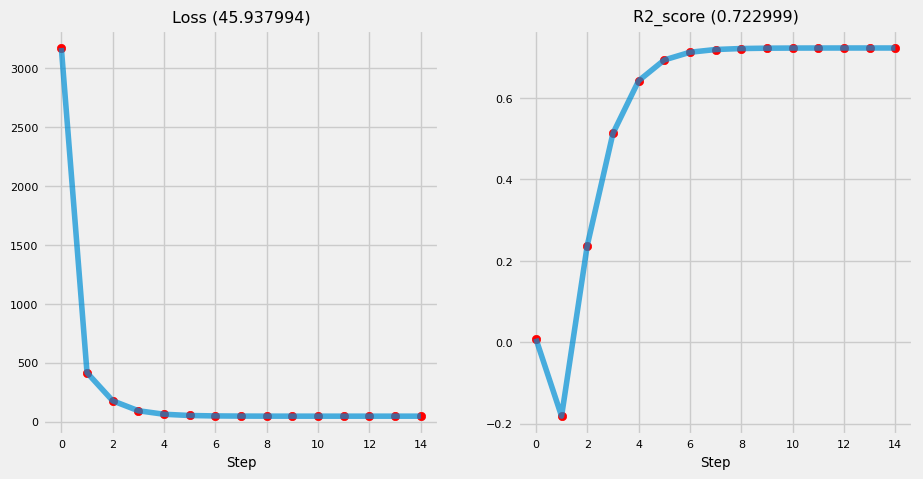

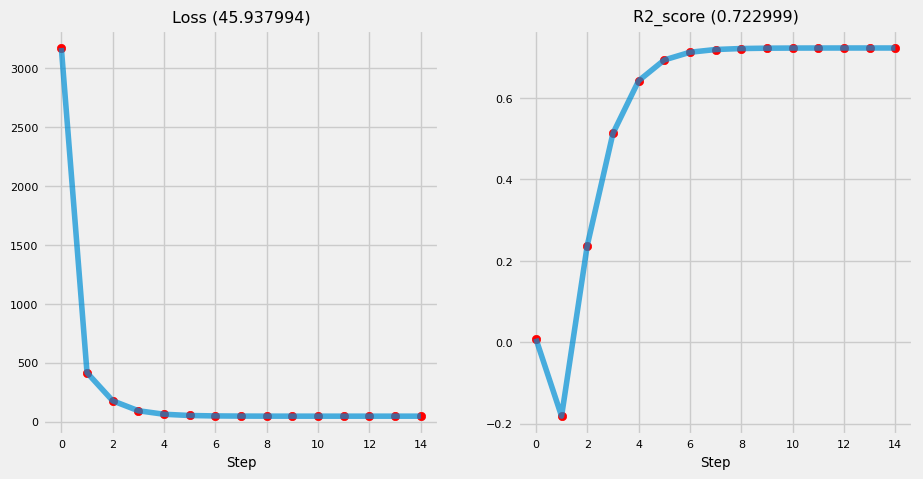

In [21]:
lr = LinearRegression(iterations=7000, history_step=500, weights=[1, 0.5], verbose=True)
plot_history(lr.fit(X, y))

In [22]:
lr.coef_

array([47.20181897,  3.91631382])

array([47.20181897,  3.91631382])

## Эксперименты
Посмотрим как алгоритм ведёт себя при измеении гиперпараметров.
Для начала обучим линейную регрессию из sklearn и отобразим точку, к которой сойдемся на графике.

In [23]:
from sklearn.linear_model import LinearRegression as SkLR

In [24]:
lr = SkLR()
lr.fit(X, y)
sk_coef = np.hstack((lr.intercept_, lr.coef_))
print(sk_coef)

[47.23214286  3.91071429]
[47.23214286  3.91071429]


Как видим наша модель вернула очень похожие коэффициенты

In [25]:
from math import ceil

In [26]:
def plot_coef_history(coef_history_list):
    cols = 4
    rows = ceil(len(coef_history_list) / cols)
    plt.figure(figsize=(10, 10 // cols * rows))

    for i, history in enumerate(coef_history_list):
        plt.subplot(rows, cols, i+1)
        plt.scatter(*sk_coef, color="red")
        plt.plot(*history.T, alpha=0.3)
        plt.scatter(*history.T)

    plt.show()

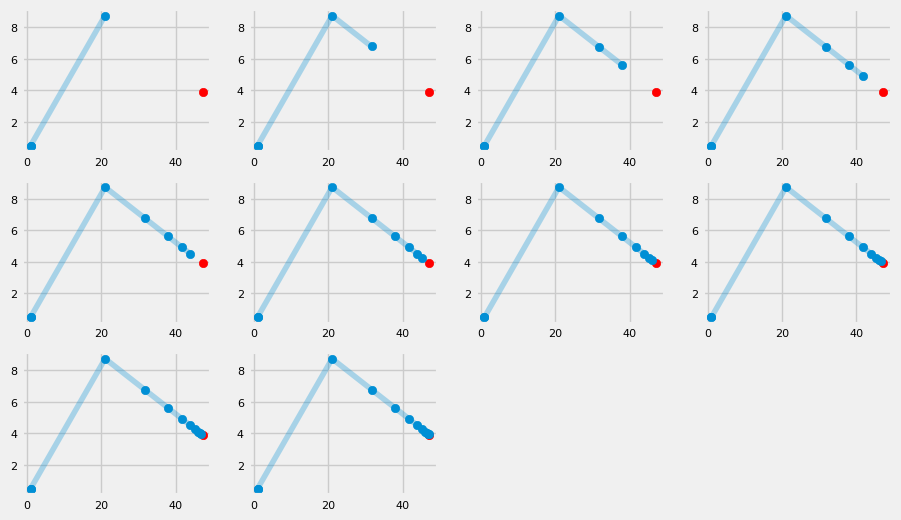

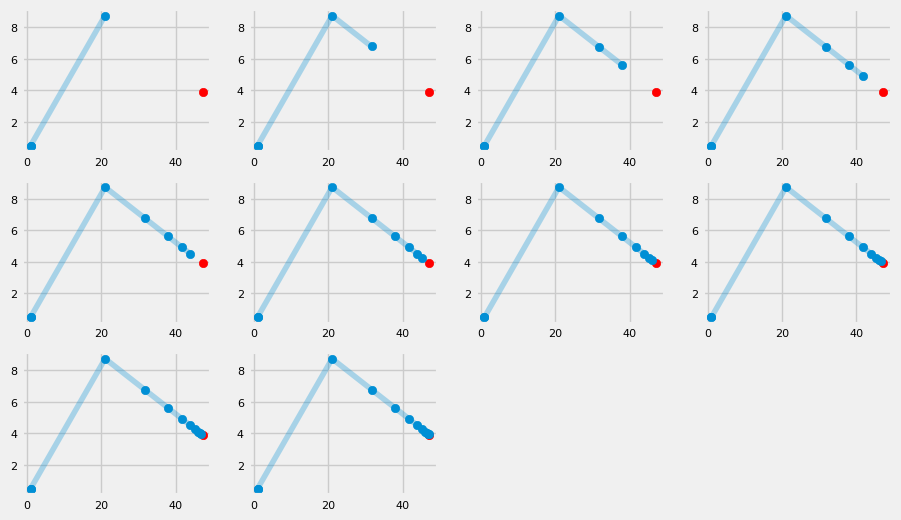

In [27]:
iterations=5000
eta=1e-3
weights=[1, 0.5]

coef_history_list = []
for iterations in range(500, 5001, 500):
    lr = LinearRegression(iterations=iterations,
                          eta=eta,
                          weights=weights,
                          save_coef_history=True,
                          history_step=500)
    lr.fit(X, y)
    coef_history_list.append(lr.coef_history)

plot_coef_history(coef_history_list)

С увеличением количества итераций получается подобраться ближе к цели

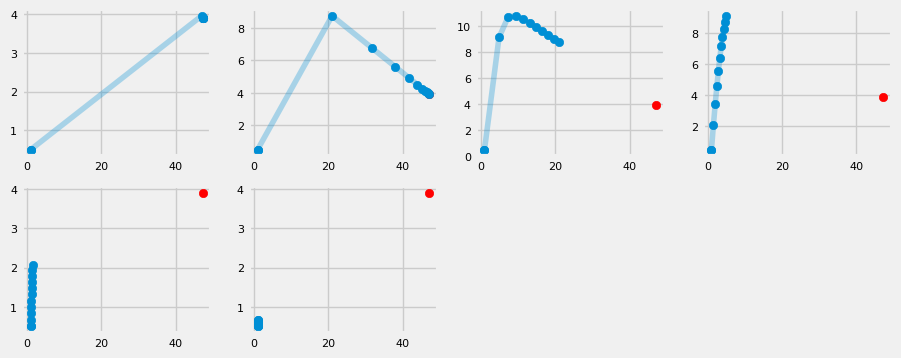

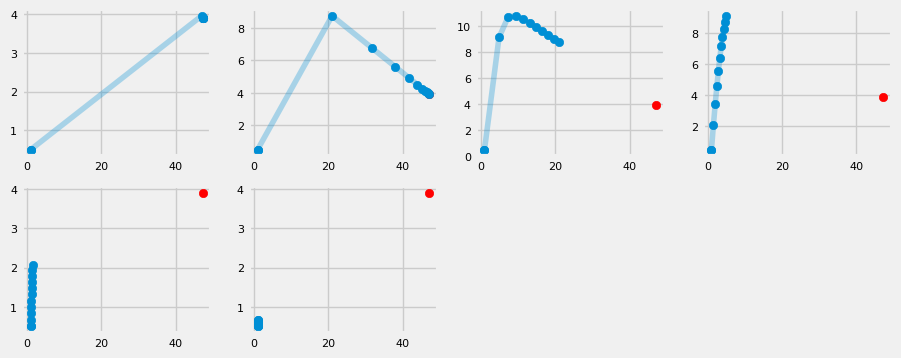

In [28]:
iterations=5000
eta=1e-3
weights=[1, 0.5]

coef_history_list = []
for eta in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    lr = LinearRegression(iterations=iterations,
                          eta=eta,
                          weights=weights,
                          save_coef_history=True,
                          history_step=500)
    lr.fit(X, y)
    coef_history_list.append(lr.coef_history)

plot_coef_history(coef_history_list)

С уменьшением скорости обучения возрастает точность алгоритма, но нужно больше итераций, чтобы приблизиться к цели. Если переборщить со скоростью обучения, то можно наоборот начать отдаляться от цели.

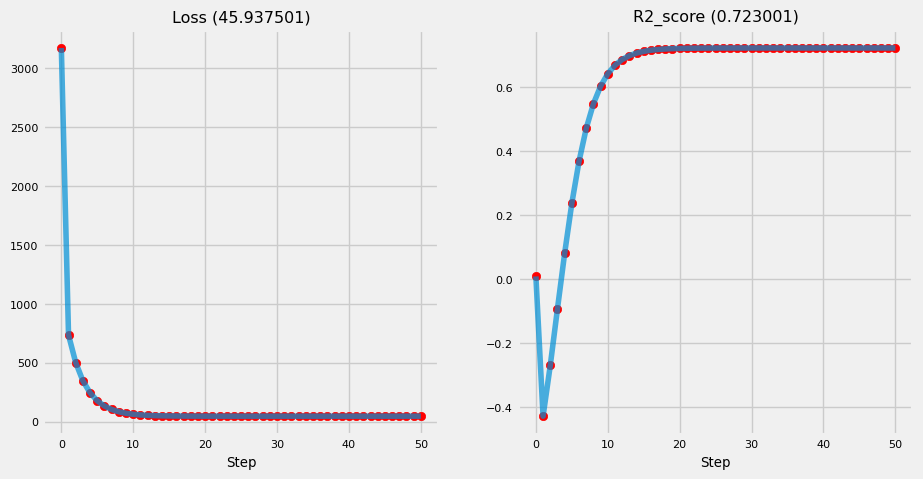

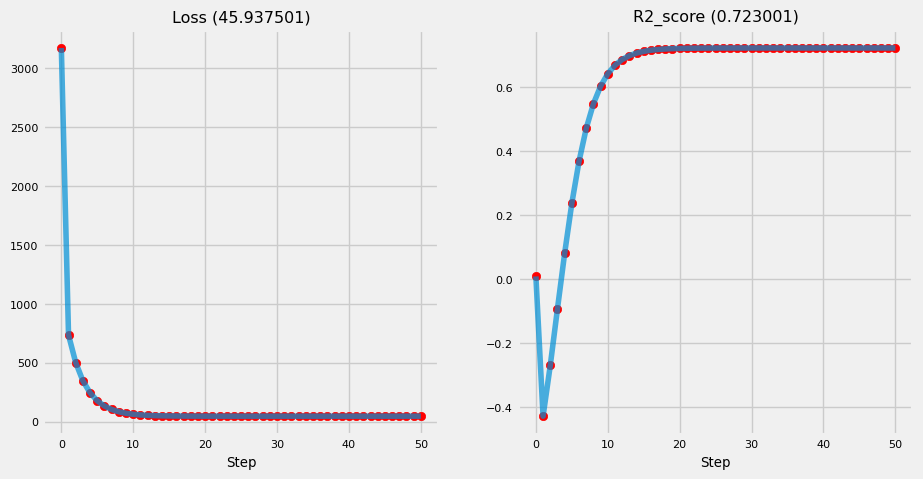

In [29]:
lr = LinearRegression(iterations=10000,
                      eta=1e-3,
                      history_step=200,
                      weights=[1, 0.5])
plot_history(lr.fit(X, y))

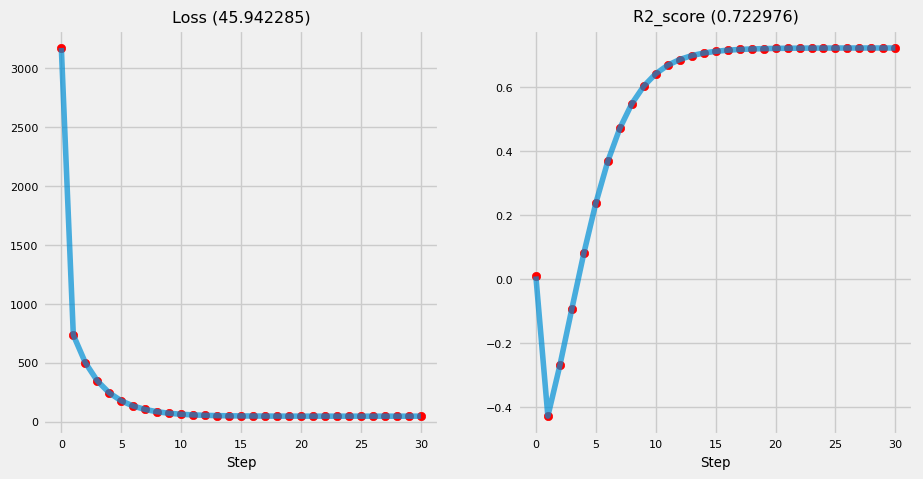

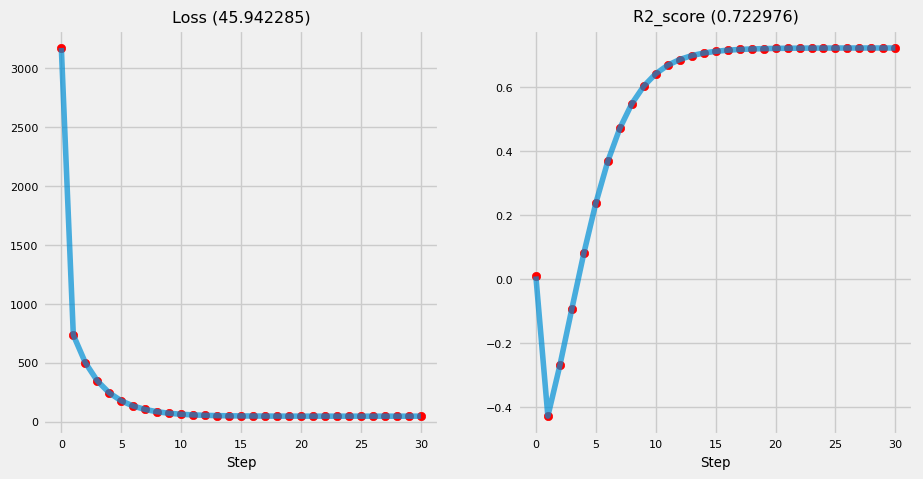

In [30]:
lr = LinearRegression(iterations=10000,
                      eta=1e-3,
                      history_step=200,
                      weights=[1, 0.5],
                      early_stopping_diff=1e-5)
plot_history(lr.fit(X, y))

Параметр early_stopping позволяет прервать обучение, когда качество перестаёт расти